<a href="https://colab.research.google.com/github/OVP2023/ML/blob/main/loss_func_dz_%D0%BC%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.


In [66]:
iris = datasets.load_iris()
df=pd.DataFrame(iris.data)
df.rename(columns={0:'sepal_length',1:'sepal_width',2:'petal_length',3: 'petal_width'}, inplace=True)
df['target']=pd.DataFrame(iris.target)
df=df[df['target']>0]#оставляем только 2 класса: Iris Versicolor, Iris Virginica.
df['target'][df['target']==2]=0 # класс Iris Virginica обозначаем 0
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   target        100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


In [67]:
df.head(70)

,sepal_length,sepal_width,petal_length,petal_width,target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
115,6.4,3.2,5.3,2.3,0
116,6.5,3.0,5.5,1.8,0
117,7.7,3.8,6.7,2.2,0
118,7.7,2.6,6.9,2.3,0


Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.

In [68]:
#Формируем дата сэты с признаками x и целевой переменной y
x=df
y=x['target']
x=x.drop(columns=['target'])
x.head()




,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


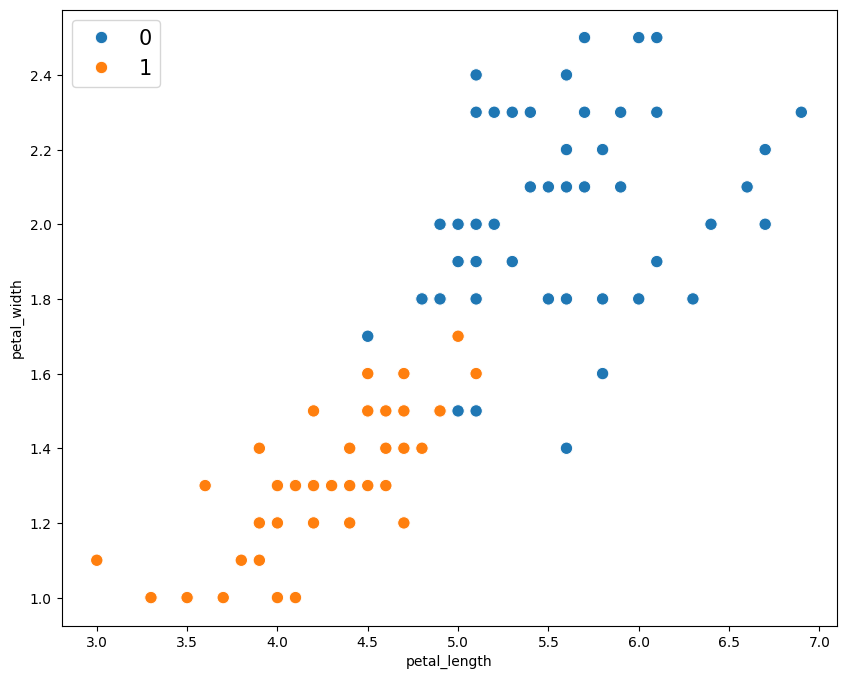

In [57]:
# зададим размер графика
plt.figure(figsize = (10, 8))
# на точечной диаграмме по осям x и y выведем признаки,
# с помощью параметра hue разделим соответствующие классы целевой переменной
sns.scatterplot(x = x['petal_length'], y = x['petal_width'], hue = df['target'], s = 80)
# добавим легенду, зададим ее расположение и размер
plt.legend(loc = 'upper left', prop = {'size': 15})
# выведем результат
plt.show()

In [69]:
def h(x, thetas): #модель логистической регрессии
  z = np.dot(x, thetas)
  return 1.0 / (1 + np.exp(-z))

# создадим вектор начальных весов (он будет состоять из нулей),
# а также переменную n, в которой будет храниться количество наблюдений
thetas, n = np.zeros(x.shape[1]), x.shape[0]
thetas, n

(array([0., 0., 0., 0.]), 100)

Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.

In [70]:
# напишем функцию логистической ошибки
def objective(y, y_pred):

  # рассчитаем функцию потерь для y = 1, добавив 1e-9, чтобы избежать ошибки при log(0)
  y_one_loss = y * np.log(y_pred + 1e-9)

  # также рассчитаем функцию потерь для y = 0
  y_zero_loss = (1 - y) * np.log(1 - y_pred + 1e-9)

  # сложим и разделим на количество наблюдений
  return -np.mean(y_zero_loss + y_one_loss)


# объявим градиент функции логистической ошибки
def gradient(x, y, y_pred, n):
  return np.dot(x.T, (y_pred - y)) / n

# создадим список, в который будем записывать размер ошибки функции потерь
loss_history = []

In [80]:
# в цикле из 10000 итераций
for i in range(10000):
  # рассчитаем прогнозное значение с текущими весами
  y_pred = h(x, thetas)
  # посчитаем уровень ошибки при текущем прогнозе
  loss_history.append(objective(y, y_pred))
  # рассчитаем градиент
  grad = gradient(x, y, y_pred, n)
  # используем градиент для улучшения весов модели
  # коэффициент скорости обучения будет равен 0,001
  thetas = thetas - 0.001 * grad
thetas

array([ 1.49672464,  1.15270761, -1.98052455, -1.83461569])

In [81]:
# объявим функцию для предсказания класса
def predict(x, thetas):
  probs = h(x, thetas) #запускаем модель логистической регрессии
  # если вероятность больше или равна 0,5 - отнесем наблюдение к классу 1, в противном случае к классу 0
  # дополнительно выведем значение вероятности
  return np.where(probs >= 0.5, 1, 0), probs

# запишем прогноз класса и вероятность этого прогноза в переменные y_pred и probs
y_pred, probs = predict(x, thetas)

# посмотрим на прогноз и вероятность для 50 и 51 наблюдения, где один класс меняет другой.
print(y_pred[49], probs[49])
print(y_pred[50], probs[50])


1 0.7779501765095025
0 0.037819173821746585


In [82]:
# в качестве метрики качества берем accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)

0.96